In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = KNeighborsRegressor()

In [11]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [12]:
base_preds = model.predict(X_test)

## Evaluation

In [13]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, base_preds)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, base_preds)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, base_preds))}')

Mean Absolute Error: 269.85
Mean Squared Error: 112260.75
Root Mean Squared Error: 335.0533539602312


## Grid Search

In [14]:
model = KNeighborsRegressor()

In [15]:
n_neighbors=[1,2,3,4]
weights= ['uniform', 'auto']

parametros = {'n_neighbors':n_neighbors,
              'weights':weights}

In [16]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [17]:
grid_model.fit(X_train,y_train)

C:\Users\andre\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_regression.py", line 215, in fit
    self._validate_params()
  File "C:\Users\andre\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraint

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'auto']},
             scoring='neg_mean_squared_error')

In [18]:
grid_model.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [19]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [20]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 288.25
Mean Squared Error: 126232.8125
Root Mean Squared Error: 355.2925730999735


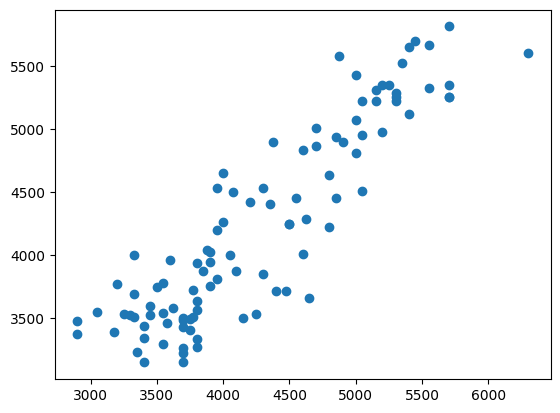

In [23]:
plt.scatter(x = y_test, y = y_pred)

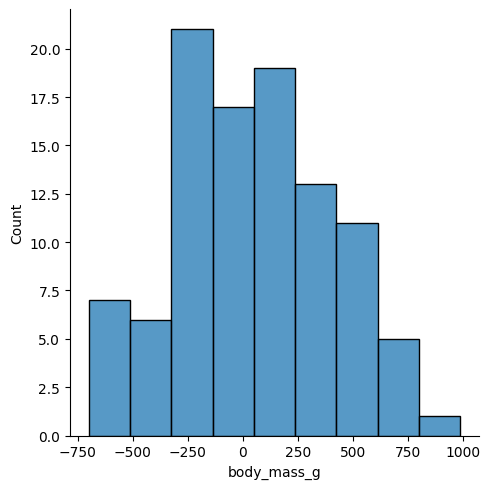

In [22]:
sns.displot(y_test- y_pred)